In [98]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import itertools
import math
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn import preprocessing
from collections import Counter
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [99]:
#csv文件导入
rawdata = pd.read_csv("./xgboost-rawdata.csv", encoding = 'gb18030')

In [100]:
#删除不需要的列（特征）
data1 = rawdata.drop(rawdata[['education','family','types']],axis=1)

In [101]:
#删除有空值的那一行数据
data1.dropna(how = 'any', inplace = True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658778 entries, 0 to 903798
Data columns (total 53 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  658778 non-null  int64  
 1   sms_04              658778 non-null  int64  
 2   sms_type_04         658778 non-null  object 
 3   sms_05              658778 non-null  int64  
 4   sms_type_05         658778 non-null  object 
 5   sms_06              658778 non-null  int64  
 6   sms_type_06         658778 non-null  object 
 7   sms_login_04        658778 non-null  int64  
 8   sms_login_05        658778 non-null  int64  
 9   sms_login_06        658778 non-null  int64  
 10  shuimian            658778 non-null  int64  
 11  hfcz                658778 non-null  int64  
 12  ci07_dd_occu_code2  658778 non-null  object 
 13  dpts_rmb_aad_bal    658778 non-null  float64
 14  sex                 658778 non-null  int64  
 15  model               658778 non-nul

In [102]:
#数据抽样
data1 = data1.sample(frac = 0.010, axis=0)

In [103]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6588 entries, 471994 to 833352
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6588 non-null   int64  
 1   sms_04              6588 non-null   int64  
 2   sms_type_04         6588 non-null   object 
 3   sms_05              6588 non-null   int64  
 4   sms_type_05         6588 non-null   object 
 5   sms_06              6588 non-null   int64  
 6   sms_type_06         6588 non-null   object 
 7   sms_login_04        6588 non-null   int64  
 8   sms_login_05        6588 non-null   int64  
 9   sms_login_06        6588 non-null   int64  
 10  shuimian            6588 non-null   int64  
 11  hfcz                6588 non-null   int64  
 12  ci07_dd_occu_code2  6588 non-null   object 
 13  dpts_rmb_aad_bal    6588 non-null   float64
 14  sex                 6588 non-null   int64  
 15  model               6588 non-null   int64  
 16 

In [104]:
# 分箱
# 对手机银行登录天数进行分箱
# print(selectData['6月手机银行登录天数'].value_counts(bins=5,normalize=True,sort=False))
result = pd.cut(data1['login_day_04'], bins=[-1, 1, 2, 4, 31], labels=[1, 2, 3, 4])
data1['login_day_04'] = result
result = pd.cut(data1['login_day_05'], bins=[-1, 1, 2, 4, 31], labels=[1, 2, 3, 4])
data1['login_day_05'] = result
result = pd.cut(data1['login_day_06'], bins=[-1, 1, 2, 4, 31], labels=[1, 2, 3, 4])
data1['login_day_06'] = result
# 对6月手机银行登录次数进行分箱
result = pd.cut(data1['login_04'], bins=[-1, 1, 4, 8, 90], labels=[1, 2, 3, 4])
data1['login_04'] = result
result = pd.cut(data1['login_05'], bins=[-1, 1, 4, 8, 90], labels=[1, 2, 3, 4])
data1['login_05'] = result
result = pd.cut(data1['login_06'], bins=[-1, 1, 4, 8, 90], labels=[1, 2, 3, 4])
data1['login_06'] = result

In [105]:
# 删除年龄段为0和6的数据
data1 = data1.query("age_type != 0 and age_type != 6")
data1.info()
data1['age_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6572 entries, 471994 to 833352
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  6572 non-null   int64   
 1   sms_04              6572 non-null   int64   
 2   sms_type_04         6572 non-null   object  
 3   sms_05              6572 non-null   int64   
 4   sms_type_05         6572 non-null   object  
 5   sms_06              6572 non-null   int64   
 6   sms_type_06         6572 non-null   object  
 7   sms_login_04        6572 non-null   int64   
 8   sms_login_05        6572 non-null   int64   
 9   sms_login_06        6572 non-null   int64   
 10  shuimian            6572 non-null   int64   
 11  hfcz                6572 non-null   int64   
 12  ci07_dd_occu_code2  6572 non-null   object  
 13  dpts_rmb_aad_bal    6572 non-null   float64 
 14  sex                 6572 non-null   int64   
 15  model               6572 non-nu

2    2199
1    1827
3    1382
4     910
5     254
Name: age_type, dtype: int64

In [106]:
# 打印有多少列
print(data1.columns.values)

['id' 'sms_04' 'sms_type_04' 'sms_05' 'sms_type_05' 'sms_06' 'sms_type_06'
 'sms_login_04' 'sms_login_05' 'sms_login_06' 'shuimian' 'hfcz'
 'ci07_dd_occu_code2' 'dpts_rmb_aad_bal' 'sex' 'model' 'shop_cusm'
 'login_day_04' 'login_day_05' 'login_day_06' 'login_04' 'login_05'
 'login_06' 'is_daifa' 'crcard' 'borm' 'is_wallet' 'dbd_fpy' 'crd_fpy'
 'ipdp' 'fmot' 'fmit' 'tpcc' 'ibas' 'bond' 'fmobs_wcurr' 'client_cust'
 'age_type' 'sms' 'dbd_pay_cn_04' 'dbd_pay_cn_05' 'dbd_pay_cn_06'
 'dbd_tran_amount_04' 'dbd_tran_amount_05' 'dbd_tran_amount_06'
 'cr_pay_cn_04' 'cr_pay_cn_05' 'cr_pay_cn_06' 'cr_tran_amount_04'
 'cr_tran_amount_05' 'cr_tran_amount_06' 'kj_date' 'jobs']


In [107]:
#先DROP 掉 4，5,6月三个月的的相关特征列
data04 = data1.drop(data1[['sms_05','sms_type_05','sms_06','sms_type_06','sms_login_05','sms_login_06',
                           'login_day_05','login_day_06','login_05','login_06','dbd_pay_cn_05','dbd_pay_cn_06',
                           'dbd_tran_amount_05','dbd_tran_amount_06','sms_04','sms_05','sms_06',
                           'cr_pay_cn_05','cr_pay_cn_06','cr_tran_amount_05','cr_tran_amount_06']],axis=1)
data05 = data1.drop(data1[['sms_04','sms_type_04','sms_06','sms_type_06','sms_login_04','sms_login_06',
                           'login_day_04','login_day_06','login_04','login_06','dbd_pay_cn_04','dbd_pay_cn_06',
                           'dbd_tran_amount_04','dbd_tran_amount_06','sms_04','sms_05','sms_06',
                           'cr_pay_cn_04','cr_pay_cn_06','cr_tran_amount_04','cr_tran_amount_06']],axis=1)
data06 = data1.drop(data1[['sms_05','sms_type_05','sms_04','sms_type_04','sms_login_05','sms_login_04',
                           'login_day_05','login_day_04','login_05','login_04','dbd_pay_cn_05','dbd_pay_cn_04',
                           'dbd_tran_amount_05','dbd_tran_amount_04','sms_04','sms_05','sms_06',
                           'cr_pay_cn_05','cr_pay_cn_04','cr_tran_amount_05','cr_tran_amount_04']],axis=1)



In [108]:
# 改列名 不区分月份  拼接在一起
data04.rename(
 columns={'sms_type_04': 'sms_type',
          'sms_login_04': 'sms_login',
          'login_day_04': 'login_day',
          'login_04': 'login',
          'dbd_pay_cn_04': 'dbd_pay_cn',
          'dbd_tran_amount_04': 'dbd_tran_amount',
          'cr_pay_cn_04': 'cr_pay_cn',
          'cr_tran_amount_04': 'cr_tran_amount'
         }, inplace=True)

data05.rename(
 columns={'sms_type_05': 'sms_type',
          'sms_login_05': 'sms_login',
          'login_day_05': 'login_day',
          'login_05': 'login',
          'dbd_pay_cn_05': 'dbd_pay_cn',
          'dbd_tran_amount_05': 'dbd_tran_amount',
          'cr_pay_cn_05': 'cr_pay_cn',
          'cr_tran_amount_05': 'cr_tran_amount'         
         }, inplace=True)

data06.rename(
 columns={'sms_type_06': 'sms_type',
          'sms_login_06': 'sms_login',
          'login_day_06': 'login_day',
          'login_06': 'login',
          'dbd_pay_cn_06': 'dbd_pay_cn',
          'dbd_tran_amount_06': 'dbd_tran_amount',
          'cr_pay_cn_06': 'cr_pay_cn',
          'cr_tran_amount_06': 'cr_tran_amount'
         }, inplace=True)

data2 = pd.concat([data04, data05, data06], axis=0)

In [109]:
# 打印数据集大小
print('处理后的数据集大小：', data2.shape)

# 打印处理后的活动类型数量
print('处理后的活动类型数量：', data2['sms_type'].nunique())

# 打印处理后的活动类型和它们的数量
print('处理后的活动类型及其数量：')
print(data2['sms_type'].value_counts())


处理后的数据集大小： (19716, 34)
处理后的活动类型数量： 54
处理后的活动类型及其数量：
福仔云游记       5319
话费充值        2706
智能外呼        1602
年年卡         1210
电费          1158
BOBO鱼塘       990
周周薪          968
流水打印         737
快捷           646
饿了么          624
数币           609
热议话题         457
资产提升         366
运动专区         340
滴滴青桔         247
账户打印         222
跨境           193
中银大学         147
校园卡          118
信用卡分期        104
尊享积分          99
视频会员          95
月刷月开心         93
五一专属活动        84
投资理财          80
聚会日           76
途牛火车票         67
中银老年大学        47
账户安全          44
个贷            40
收支记录          37
生日礼           35
猫眼电影          22
随心智贷          22
麦当劳           22
花加            16
代发薪           14
周六聚会日         14
扫码取款           7
公益中国           5
证件到期           4
国债             4
信用卡支付宝绑卡       4
征信查询           3
权益白名单          3
农夫山泉           3
信用卡功能          3
信用卡            2
密码重置           2
内控管控           2
房贷             1
中银头条           1
信用卡积分          1
身份证到期          1
Name: sms_type, dtype: int64


In [110]:
# 删除活跃为0的数据
data2 = data2.query("sms_login == 1")

In [111]:
# 打印数据集大小
print('处理后的数据集大小：', data2.shape)

# 打印处理后的活动类型数量
print('处理后的活动类型数量：', data2['sms_type'].nunique())

# 打印处理后的活动类型和它们的数量
print('处理后的活动类型及其数量：')
print(data2['sms_type'].value_counts())

处理后的数据集大小： (9094, 34)
处理后的活动类型数量： 45
处理后的活动类型及其数量：
福仔云游记       2699
话费充值        1145
智能外呼         757
年年卡          612
电费           596
BOBO鱼塘       448
快捷           442
饿了么          323
周周薪          307
热议话题         269
流水打印         235
资产提升         173
账户打印         149
滴滴青桔         124
数币           121
中银大学          71
运动专区          59
校园卡           57
视频会员          55
月刷月开心         54
五一专属活动        47
投资理财          43
聚会日           40
尊享积分          38
信用卡分期         34
途牛火车票         29
账户安全          25
个贷            22
中银老年大学        20
生日礼           16
收支记录          12
麦当劳           11
猫眼电影          11
随心智贷          10
代发薪           10
花加             8
跨境             8
信用卡支付宝绑卡       3
内控管控           2
公益中国           2
国债             2
证件到期           2
密码重置           1
周六聚会日          1
信用卡            1
Name: sms_type, dtype: int64


In [112]:
# #转换为one-hot热编码
# data2 = pd.get_dummies(data2, columns=['jobs'])
# data2 = pd.get_dummies(data2, columns=['login_day'])
# data2 = pd.get_dummies(data2, columns=['login'])
# data2 = pd.get_dummies(data2, columns=['client_cust'])
# data2 = pd.get_dummies(data2, columns=['age_type'])

In [113]:
# #连续性特征标准化 金额类
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data2['dpts_rmb_aad_bal'] = scaler.fit_transform(data2[['dpts_rmb_aad_bal']])
# data2['dbd_tran_amount'] = scaler.fit_transform(data2[['dbd_tran_amount']])
# data2['cr_tran_amount'] = scaler.fit_transform(data2[['cr_tran_amount']])
# data2['dbd_pay_cn'] = scaler.fit_transform(data2[['dbd_pay_cn']])
# data2['cr_pay_cn'] = scaler.fit_transform(data2[['cr_pay_cn']])
# data2['kj_date'] = scaler.fit_transform(data2[['kj_date']])

In [114]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9094 entries, 679944 to 833352
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  9094 non-null   int64   
 1   sms_type            9094 non-null   object  
 2   sms_login           9094 non-null   int64   
 3   shuimian            9094 non-null   int64   
 4   hfcz                9094 non-null   int64   
 5   ci07_dd_occu_code2  9094 non-null   object  
 6   dpts_rmb_aad_bal    9094 non-null   float64 
 7   sex                 9094 non-null   int64   
 8   model               9094 non-null   int64   
 9   shop_cusm           9094 non-null   int64   
 10  login_day           9094 non-null   category
 11  login               9078 non-null   category
 12  is_daifa            9094 non-null   int64   
 13  crcard              9094 non-null   int64   
 14  borm                9094 non-null   int64   
 15  is_wallet           9094 non-nu

In [126]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 绘制混淆矩阵的函数
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontproperties=FontProperties(fname='/System/Library/Fonts/PingFang.ttc')) # 这里设置中文字体
    plt.yticks(tick_marks, classes, fontproperties=FontProperties(fname='/System/Library/Fonts/PingFang.ttc')) # 这里设置中文字体

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontproperties=FontProperties(fname='/System/Library/Fonts/PingFang.ttc')) # 这里设置中文字体

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




In [116]:
def plot_importance(classifer, x_train, point_size = 25):
    '''plot feature importance'''
    values = sorted(zip(x_train.columns, classifer.feature_importances_), key = lambda x: x[1] * -1)
    imp = pd.DataFrame(values,columns = ["Name", "Score"])
    imp.sort_values(by = 'Score',inplace = True)
    sns.scatterplot(x = 'Score',y='Name', linewidth = 0,
                data = imp,s = point_size, color='red').set(
    xlabel='importance', 
    ylabel='features')

In [117]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9094 entries, 679944 to 833352
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  9094 non-null   int64   
 1   sms_type            9094 non-null   object  
 2   sms_login           9094 non-null   int64   
 3   shuimian            9094 non-null   int64   
 4   hfcz                9094 non-null   int64   
 5   ci07_dd_occu_code2  9094 non-null   object  
 6   dpts_rmb_aad_bal    9094 non-null   float64 
 7   sex                 9094 non-null   int64   
 8   model               9094 non-null   int64   
 9   shop_cusm           9094 non-null   int64   
 10  login_day           9094 non-null   category
 11  login               9078 non-null   category
 12  is_daifa            9094 non-null   int64   
 13  crcard              9094 non-null   int64   
 14  borm                9094 non-null   int64   
 15  is_wallet           9094 non-nu

In [118]:
# 替换空值 
# 职业编码-->'0'
# 存款活期余额-->'0'
selectData = data2.fillna(
 {'ci07_dd_occu_code2': '0',
 'jobs': '暂无',
 'dbd_tran_amount': '0',
 'cr_tran_amount': '0',
 'dbd_pay_cn': '0',
 'cr_pay_cn': '0',
 'login_day_1': '0',
 'login_day_2': '0',
 'login_day_3': '0',
 'login_day_4': '0',
 'login_1': '0',
 'login_2': '0',
 'login_3': '0',
 'login_4': '0'})
selectData.to_csv("newdata1.csv", encoding="gbk")
selectData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9094 entries, 679944 to 833352
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  9094 non-null   int64   
 1   sms_type            9094 non-null   object  
 2   sms_login           9094 non-null   int64   
 3   shuimian            9094 non-null   int64   
 4   hfcz                9094 non-null   int64   
 5   ci07_dd_occu_code2  9094 non-null   object  
 6   dpts_rmb_aad_bal    9094 non-null   float64 
 7   sex                 9094 non-null   int64   
 8   model               9094 non-null   int64   
 9   shop_cusm           9094 non-null   int64   
 10  login_day           9094 non-null   category
 11  login               9078 non-null   category
 12  is_daifa            9094 non-null   int64   
 13  crcard              9094 non-null   int64   
 14  borm                9094 non-null   int64   
 15  is_wallet           9094 non-nu

In [119]:
selectData['jobs'].value_counts()

商业、服务业人员                1928
生产、运输设备操作人员及有关人员        1270
学生                      1047
私营业主                     717
行政办公人员                   527
教学人员                     408
其他专业技术人员                 377
卫生专业技术人员                 366
农、林、牧、渔、水利业生产人员          352
家庭主妇                     343
事业单位员工                   323
其他办事人员和有关人员              305
金融业务人员                   254
退休人员                     235
工程技术（计算机）人员              207
企业负责人                     81
经济业务人员                    57
安全保卫和消防工作人员               49
无职业活动人员                   40
邮政和电信业务人员                 29
会计师                       27
军人                        24
国家机关及其工作机构负责人             21
新闻出版、文化工作人员               21
法律专业人员                    19
文学艺术工作人员                  16
事业单位负责人                   13
体育工作人员                     9
科学研究人员                     8
农业技术人员                     8
飞行和船舶技术等人员                 6
不便分类的其他从业人员                5
中国共产党中央委员会和地方各级组织负责人       2
Name: jobs, dtype: int64

In [120]:
# 创建一个 LabelEncoder
encoder = LabelEncoder()
# 使用 LabelEncoder 对 '6月短信营销类型' 进行编码
data2['sms_type_encoded'] = encoder.fit_transform(data2['sms_type'])
# 对编码后的 '6月短信营销类型_encoded' 进行分组，然后计算每组中'6月发送短信手机银行活跃'的平均值
activity_preference = data2.groupby('sms_type_encoded')['sms_login'].mean()
# 找出偏好性最强的前五个活动
top5_preferred_activities = activity_preference.nlargest(10).index
# 将标签转换回原来的类别
top5_preferred_activities_labels = encoder.inverse_transform(top5_preferred_activities)
top5_preferred_activities_labels

array(['BOBO鱼塘', '个贷', '中银大学', '中银老年大学', '五一专属活动', '代发薪', '信用卡', '信用卡分期',
       '信用卡支付宝绑卡', '公益中国'], dtype=object)

In [121]:
selectData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9094 entries, 679944 to 833352
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  9094 non-null   int64   
 1   sms_type            9094 non-null   object  
 2   sms_login           9094 non-null   int64   
 3   shuimian            9094 non-null   int64   
 4   hfcz                9094 non-null   int64   
 5   ci07_dd_occu_code2  9094 non-null   object  
 6   dpts_rmb_aad_bal    9094 non-null   float64 
 7   sex                 9094 non-null   int64   
 8   model               9094 non-null   int64   
 9   shop_cusm           9094 non-null   int64   
 10  login_day           9094 non-null   category
 11  login               9078 non-null   category
 12  is_daifa            9094 non-null   int64   
 13  crcard              9094 non-null   int64   
 14  borm                9094 non-null   int64   
 15  is_wallet           9094 non-nu

In [123]:
from sklearn import metrics
from imblearn.combine import SMOTEENN
selectData = selectData.dropna(subset=['shuimian','hfcz'
,'dpts_rmb_aad_bal','sex','model','shop_cusm','login_day','login','is_daifa','crcard'
,'borm','is_wallet','dbd_fpy','crd_fpy','ipdp','fmot','fmit','tpcc','ibas','bond'
,'fmobs_wcurr','client_cust','age_type','dbd_pay_cn','dbd_tran_amount','cr_pay_cn'
,'cr_tran_amount','jobs'])

selectData = selectData.query("sms_type != '周六聚会日'")
# selectData = selectData.query("sms_type != '公益中国'")
# selectData = selectData.query("sms_type != '密码重置'")
# selectData = selectData.query("sms_type != '信用卡功能'")
# selectData = selectData.query("sms_type != '扫码取款'")
# selectData = selectData.query("sms_type != '信用卡支付宝绑卡'")
selectData['sms_type'].value_counts()

# 打印数据集大小
print('处理后的数据集大小：', selectData.shape)
# 打印处理后的活动类型数量
print('处理后的活动类型数量：', selectData['sms_type'].nunique())
# 打印处理后的活动类型和它们的数量
print('处理后的活动类型及其数量：')
print(selectData['sms_type'].value_counts())

#-----------------数据预处理完成, 开始逻辑回归机器学习步骤--------------------------------------------
# 对目标变量进行编码
le = LabelEncoder()
y = le.fit_transform(selectData['sms_type'])
print(y)
# 将数据分为特征和目标
X = selectData[['shuimian','hfcz'
,'dpts_rmb_aad_bal','sex','model','shop_cusm','login_day','login','is_daifa','crcard'
,'borm','is_wallet','dbd_fpy','crd_fpy','ipdp','fmot','fmit','tpcc','ibas','bond'
,'fmobs_wcurr','client_cust','age_type','dbd_pay_cn','dbd_tran_amount','cr_pay_cn'
,'cr_tran_amount','jobs']]
# print(X)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 初始化标准化器
scaler = StandardScaler()
X[['shuimian','hfcz'
,'dpts_rmb_aad_bal','sex','model','shop_cusm','login_day','login','is_daifa','crcard'
,'borm','is_wallet','dbd_fpy','crd_fpy','ipdp','fmot','fmit','tpcc','ibas','bond'
,'fmobs_wcurr','client_cust','age_type','dbd_pay_cn','dbd_tran_amount','cr_pay_cn'
,'cr_tran_amount']]
# 对分类变量进行独热编码
#转换为one-hot热编码
X = pd.get_dummies(X, columns=['jobs', 'login_day', 'login', 'client_cust', 'age_type'])

smote_enn = SMOTEENN(random_state=0, smote=SMOTE(k_neighbors=1))
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

# 初始化逻辑回归模型，使用L1正则化和一对多策略处理多类别问题
model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')

# 用训练数据拟合模型
model.fit(X_train, y_train)


# 初始化一个字典，用于存储每个特征的系数列表
coeff_dict = {col: [] for col in X.columns}    
# 输出每个特征的系数，并存入对应的列表中
for i in range(len(le.classes_)):
#     print(f'Class {le.classes_[i]} coefficients:')
    for j in range(len(X.columns)):
        coeff = model.coef_[i][j]
#         print(f'Feature {X.columns[j]}: {coeff}')
        coeff_dict[X.columns[j]].append(coeff)  # 将特征的系数添加到对应的列表中
print(f'特征系数绝对值的平均值')
# 输出每个特征的平均系数的绝对值
for feature, coeffs in coeff_dict.items():
    absolute_coeffs = [abs(coeff) for coeff in coeffs]
    print(f'Feature {feature}: {np.mean(absolute_coeffs)}')
# 对测试集进行预测
y_pred = model.predict(X_test)
# 计算模型的准确度
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

处理后的数据集大小： (9073, 34)
处理后的活动类型数量： 41
处理后的活动类型及其数量：
福仔云游记       2698
话费充值        1145
智能外呼         756
年年卡          612
电费           590
BOBO鱼塘       448
快捷           442
饿了么          323
周周薪          307
热议话题         269
流水打印         234
资产提升         172
账户打印         145
滴滴青桔         124
数币           119
中银大学          71
运动专区          59
校园卡           57
视频会员          55
月刷月开心         54
五一专属活动        47
投资理财          43
聚会日           40
尊享积分          38
信用卡分期         34
途牛火车票         29
账户安全          25
个贷            22
中银老年大学        20
生日礼           16
收支记录          12
麦当劳           11
猫眼电影          11
随心智贷          10
代发薪           10
花加             8
跨境             8
信用卡支付宝绑卡       3
内控管控           2
国债             2
证件到期           2
Name: sms_type, dtype: int64
[ 9 31 31 ... 38 34 26]
特征系数绝对值的平均值
Feature shuimian: 3.62361432665223
Feature hfcz: 1.7269379323224472
Feature dpts_rmb_aad_bal: 5.0337676488515565e-05
Feature sex: 1.3955042268340174
Feature model: 1.444409392026133
Featu

In [125]:
from matplotlib.font_manager import fontManager
import os

for font in fontManager.ttflist:
    if os.path.exists(font.fname) and os.stat(font.fname).st_size > 1e6:  # 筛选大于1MB的字体文件
        print(font.name, ":", font.fname)


Kohinoor Devanagari : /System/Library/Fonts/Kohinoor.ttc
PingFang HK : /System/Library/Fonts/PingFang.ttc
Hiragino Mincho ProN : /System/Library/Fonts/ヒラギノ明朝 ProN.ttc
AppleMyungjo : /System/Library/Fonts/Supplemental/AppleMyungjo.ttf
Iowan Old Style : /System/Library/Fonts/Supplemental/Iowan Old Style.ttc
Mukta Mahee : /System/Library/Fonts/MuktaMahee.ttc
Arial Unicode MS : /System/Library/Fonts/Supplemental/Arial Unicode.ttf
Thonburi : /System/Library/Fonts/Thonburi.ttc
Cochin : /System/Library/Fonts/Supplemental/Cochin.ttc
PT Sans : /System/Library/Fonts/Supplemental/PTSans.ttc
Kailasa : /System/Library/Fonts/Supplemental/Kailasa.ttc
Avenir : /System/Library/Fonts/Avenir.ttc
Hiragino Sans : /System/Library/Fonts/ヒラギノ角ゴシック W1.ttc
.SF Compact : /System/Library/Fonts/SFCompact.ttf
.Arabic UI Display : /System/Library/Fonts/ArabicUIDisplay.ttc
Hiragino Sans GB : /System/Library/Fonts/Hiragino Sans GB.ttc
Geeza Pro : /System/Library/Fonts/GeezaPro.ttc
Avenir Next Condensed : /System/Li

In [127]:
# 图表支持中文字体
plt.rcParams['font.sans-serif']=['PingFang HK']
#Windows系统下，设置中文字体
plt.rcParams['axes.unicode_minus']=False
#解决负号显示为方块的问题

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

selectData = selectData.dropna(subset=['shuimian','hfcz'
,'sex','model','shop_cusm','login_day','login','is_daifa','crcard'
,'borm','is_wallet','dbd_fpy','ipdp','fmot','fmit','tpcc','ibas','bond'
,'fmobs_wcurr','client_cust','age_type','jobs'])

selectData['sms_type'].value_counts()
# selectData = selectData.query("sms_type != '存款'")

# 打印数据集大小
print('处理后的数据集大小：', selectData.shape)
# 打印处理后的活动类型数量
print('处理后的活动类型数量：', selectData['sms_type'].nunique())
# 打印处理后的活动类型和它们的数量
print('处理后的活动类型及其数量：')
print(selectData['sms_type'].value_counts())
#-----------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV

# 假设用户的特征存储在以下列中
user_features = ['shuimian','hfcz'
,'sex','model','shop_cusm','login_day','login','is_daifa','crcard'
,'borm','is_wallet','dbd_fpy','ipdp','fmot','fmit','tpcc','ibas','bond'
,'fmobs_wcurr','client_cust','age_type','jobs'] # user personal info
# activity_features = ['sms_login']  # activity info

# 将用户特征和短信营销类型合并为特征矩阵
X = selectData[user_features]

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 初始化标准化器
scaler = StandardScaler()
X[['shuimian','hfcz'
,'sex','model','shop_cusm','is_daifa','crcard'
,'borm','is_wallet','dbd_fpy','ipdp','fmot','fmit','tpcc','ibas','bond'
,'fmobs_wcurr']]
# 对分类变量进行独热编码
#转换为one-hot热编码
X = pd.get_dummies(X, columns=['jobs', 'login_day', 'login', 'client_cust', 'age_type'])

y = selectData['sms_type']

# 对标签进行编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)




smote_enn = SMOTEENN(random_state=0, smote=SMOTE(k_neighbors=1))
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

# # 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# 初始化模型
model = XGBClassifier()

# 初始化网格搜索对象
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')

# 将分类器与训练数据拟合
# 将分类器与训练数据拟合
grid_search.fit(X_train, y_train)


# 输出最佳参数
print(f'Best parameters: {grid_search.best_params_}')

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

import pickle

# 保存模型到文件
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


# 将预测的编码转换回原始的活动类型
y_pred_labels = encoder.inverse_transform(y_pred)

# 创建一个新的 DataFrame，包含测试集的预测和真实结果
# result_df = pd.DataFrame(X_test, columns=user_features + activity_features)
result_df = pd.DataFrame(X_test, columns=user_features)
result_df['Real_sms_type'] = encoder.inverse_transform(y_test)
result_df['Predicted_sms_type'] = y_pred_labels

# 打印出前几行
print(result_df.head(30))

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_pred, average='macro')))
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
# 获取类别名称
class_names = encoder.classes_

# # 绘制混淆矩阵
 plot_confusion_matrix(confusion_matrix(y_test,y_pred), classes=class_names, normalize=True, title='Normalized Confusion Matrix: Xgboost')

处理后的数据集大小： (9014, 34)
处理后的活动类型数量： 40
处理后的活动类型及其数量：
福仔云游记     2719
话费充值      1226
智能外呼       741
年年卡        600
电费         599
快捷         458
BOBO鱼塘     398
饿了么        295
周周薪        284
热议话题       256
流水打印       199
资产提升       160
数币         136
账户打印       128
滴滴青桔       102
运动专区        62
中银大学        58
视频会员        58
五一专属活动      57
校园卡         55
月刷月开心       52
投资理财        50
尊享积分        41
聚会日         40
途牛火车票       37
信用卡分期       31
个贷          24
账户安全        24
收支记录        23
随心智贷        14
代发薪         13
生日礼         13
中银老年大学      12
花加          11
猫眼电影        10
麦当劳          9
跨境           8
内控管控         4
周六聚会日        4
扫码取款         3
Name: sms_type, dtype: int64
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
       shuimian  hfcz  sex  model  shop_cusm  login_day  login  is_daifa  \
22535         1     0    0      1          0        NaN    NaN         0   
20718         1     0    0      1          0        NaN    NaN         1   
30560         1

In [89]:
import pandas as pd
# 读取新数据
new_data = pd.read_csv('测试客群0810.csv', encoding='gb18030')
# 删除年龄段为0和6的数据
new_data = new_data.query("age_type != 0 and age_type != 6")

# 定义要删除的职业
jobs_to_remove = ['外交人员', '中国共产党中央委员会和地方各级组织负责人']

# 只保留不属于要删除的职业的行
new_data = new_data[~new_data['jobs'].isin(jobs_to_remove)]



In [90]:
# 分箱
# 对手机银行登录天数进行分箱
# print(selectData['6月手机银行登录天数'].value_counts(bins=5,normalize=True,sort=False))
result = pd.cut(new_data['login_day_04'], bins=[-1, 1, 2, 4, 31], labels=[1, 2, 3, 4])
new_data['login_day_04'] = result
result = pd.cut(new_data['login_day_05'], bins=[-1, 1, 2, 4, 31], labels=[1, 2, 3, 4])
new_data['login_day_05'] = result
result = pd.cut(new_data['login_day_06'], bins=[-1, 1, 2, 4, 31], labels=[1, 2, 3, 4])
new_data['login_day_06'] = result
# 对6月手机银行登录次数进行分箱
result = pd.cut(new_data['login_04'], bins=[-1, 1, 4, 8, 90], labels=[1, 2, 3, 4])
new_data['login_04'] = result
result = pd.cut(new_data['login_05'], bins=[-1, 1, 4, 8, 90], labels=[1, 2, 3, 4])
new_data['login_05'] = result
result = pd.cut(new_data['login_06'], bins=[-1, 1, 4, 8, 90], labels=[1, 2, 3, 4])
new_data['login_06'] = result

In [91]:
#先DROP 掉 4，5,6月三个月的的相关特征列
data04 = new_data.drop(new_data[['login_day_05','login_day_06','login_05','login_06']],axis=1)
data05 = new_data.drop(new_data[['login_day_04','login_day_06','login_04','login_06']],axis=1)
data06 = new_data.drop(new_data[['login_day_05','login_day_04','login_05','login_04']],axis=1)

In [92]:
data04.rename(
 columns={'login_day_04': 'login_day',
          'login_04': 'login',
         }, inplace=True)

data05.rename(
 columns={'login_day_05': 'login_day',
          'login_05': 'login',
         }, inplace=True)


data06.rename(
 columns={'login_day_06': 'login_day',
          'login_06': 'login',
         }, inplace=True)


In [93]:
data06['jobs'].value_counts()

生产、运输设备操作人员及有关人员     9342
商业、服务业人员             9217
学生                   3407
私营业主                 2967
农、林、牧、渔、水利业生产人员      2643
家庭主妇                 1888
其他专业技术人员             1641
教学人员                 1625
行政办公人员               1567
退休人员                 1511
卫生专业技术人员             1332
其他办事人员和有关人员          1223
事业单位员工               1107
工程技术（计算机）人员           674
金融业务人员                390
安全保卫和消防工作人员           338
企业负责人                 288
无职业活动人员               184
经济业务人员                140
邮政和电信业务人员              92
事业单位负责人                80
新闻出版、文化工作人员            77
会计师                    70
军人                     69
文学艺术工作人员               66
不便分类的其他从业人员            60
农业技术人员                 54
法律专业人员                 51
国家机关及其工作机构负责人          43
飞行和船舶技术等人员             21
科学研究人员                 19
民主党派、社会团体及工作机构负责人      17
体育工作人员                 12
Name: jobs, dtype: int64

In [94]:
# 删除年龄段为0和6的数据
data06 = data06.query("age_type != 0 and age_type != 6")



In [97]:
import pandas as pd
# 读取新数据
# new_data = pd.read_csv('测试客群0810.csv', encoding='gb18030')
# 选择与训练模型时相同的特征列

X = data06[user_features]

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 初始化标准化器
scaler = StandardScaler()
X[['shuimian','hfcz'
,'sex','model','shop_cusm','is_daifa','crcard'
,'borm','is_wallet','dbd_fpy','ipdp','fmot','fmit','tpcc','ibas','bond'
,'fmobs_wcurr']]
# 对分类变量进行独热编码
#转换为one-hot热编码
X = pd.get_dummies(X, columns=['jobs', 'login_day', 'login', 'client_cust', 'age_type'])

    
# # 从新数据中删除多余的特征
# extra_features = set(X.columns) - set(X_train.columns)
# X = X.drop(columns=extra_features)


new_pred = best_model.predict(X)
# 将预测的编码转换回原始的活动类型(如果需要)
new_pred_labels = encoder.inverse_transform(new_pred)
# 将预测结果添加到新数据的DataFrame中
new_data['Predicted_短信营销类型'] = new_pred_labels
保存或查看结果
print(new_data.head())
# 创建一个空的DataFrame来存储最终结果
final_result = pd.DataFrame(columns=['核心客户号', 'sms_type'])

# 遍历新数据的每一行，并将结果添加到最终的DataFrame
for index, row in new_data.iterrows():
    customer_id = row['cif']
    marketing_type = row['Predicted_sms_type']
    final_result = final_result.append({'核心客户号': customer_id, 'sms_type': marketing_type}, ignore_index=True)

# 将最终结果导出到CSV文件
final_result.to_csv('marketing_types_customers02.csv', index=False, encoding='utf-8')



NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


FileNotFoundError: [Errno 2] No such file or directory: '/Users/antoniozhou/Desktop/ML.ttf'

<Figure size 640x480 with 1 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Normalized confusion matrix
[[0.91297468 0.         0.         ... 0.         0.00316456 0.        ]
 [0.         0.99938613 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99857245 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.02159244 0.         0.00404858 ... 0.         0.83670715 0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

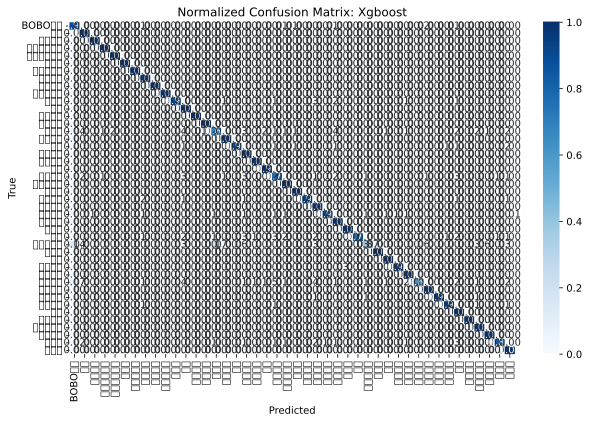

In [55]:
#解决负号显示为方块的问题
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

# Define the font properties using the uploaded font file
simhei_font = FontProperties(fname="/Users/antoniozhou/Desktop/ML.ttf")  # Update the path

# Then, you can use this font in your plots
plt.figure()
plt.title('中文标题', fontproperties=simhei_font)
plt.show()


# Now calling the modified plot_confusion_matrix function:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=class_names, normalize=True, title='Normalized Confusion Matrix: Xgboost')


In [50]:
predic_data = new_data['cif','Predicted_短信营销类型']
predic_data.to_csv('marketing_types_customers.csv', index=False, encoding='utf-8')

KeyError: ('cif', 'Predicted_短信营销类型')

In [136]:
# 新的数据，假设已经加载并预测，并且DataFrame包括'客户编号'和'Predicted_6月短信营销类型'列
# new_data = pd.read_csv('sampled_success3.csv', encoding='gb18030')
# 使用之前的模型进行预测
# new_X = new_data[user_features].values
# new_pred = best_model.predict(new_X)
# new_pred_labels = encoder.inverse_transform(new_pred)
# # 将预测结果添加到新数据的DataFrame
# new_data['Predicted_6月短信营销类型'] = new_pred_labels
# # 按照预测的营销类型分组
groups = new_data.groupby('Predicted_短信营销类型')
# 创建一个空的DataFrame来存储最终结果
final_result = pd.DataFrame(columns=['核心客户号', '营销类型'])

# 遍历每个组并将结果添加到最终的DataFrame
for name, group in groups:
    for customer_id in group['cif'].tolist():
        print(customer_id)
        final_result = final_result.append({'核心客户号': customer_id, '营销类型': name}, ignore_index=True)

# 将最终结果导出到CSV文件
final_result.to_csv('marketing_types_customers.csv', index=False, encoding='utf-8')


212852779
293752010
768543204
195797479
197712299
427505461
285995136
302824117
212747241
371131825
197710073
370898749
464451584
592770777
194288321
195752285
759309953
477518236
212626875
591919429
599198900
466059636
197197681
775150842
317834288
197174065
596772128
197055044
212815489
425258739
376094954
194288595
590114715
549414705
212793238
198856085
198082702
196998480
476222370
280427496
596845854
217010118
193616731
195955614
592655505
212698786
264964166
398126083
193214866
198411256
212902087
195846181
779633429
303054287
212673550
417852684
462581056
606525037
477328864
339949619
191134214
322079985
385029846
197711256
768458567
470403481
295662150
212851895
586192747
410964419
197593145
212805117
527177047
475596910
326144412
363871072
212691185
414972718
527685793
584236138
194430036
478574315
304814703
755852173
196997543
198754259
311416899
212701651
198408534
194792765
194034930
453432669
199511464
337923946
173052277
768160759
392237072
511834450
535181249
519172079


: 

In [ ]:
import pandas as pd

#读取新数据
new_data = pd.read.csv('01.csv')

#选择与训练模型相同的特征列
new_data_features = new_data[user_features]

#使用最佳模型进行预测
new_pred = best_model.predict(new_data_features)

#将预测的编码转换为原来的活动类型
new_pred_labels = encoder.inverse_transform(new_pred)

#将预测的结果添加到新数据的DATAFRAME中
new_data['predicted_手机短信营销类型'] = new_pred_labels

#保存或查看结果
new_data.to_csv('predicted_01.csv', index=False)
print(new_data.head())

In [ ]:
#新的数据，假设已经加载并预测， 并且DataFrame包括'客户编号'和'Predicted_短信营销类型'列
#可以使用以下代码

#从01.csv中加载新数据
new_data = pd.read_csv('01.csv')

# 使用之前的模型进行预测
new_X = new_data[user_features]
new_pred = best_model.predict(new_X)
new_pred_labels = encoder.inverse_transform(new_pred)

# 将预测结果添加到新数据的DataFrame
new_data['predicted_短信营销类型'] = new_pred_labels

# 按照预测的营销类型分组
groups = new_data.groupby('predicted_短信营销类型')

#遍历每个组打印客户号
for name, group in groups:
    print(f"{name}:")
    print(group['客户编号'].tolist())